In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline

# Make the plots look nice using latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


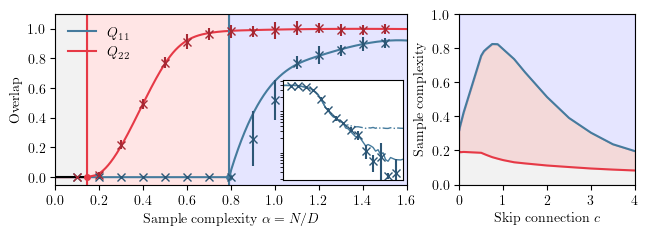

In [115]:
def spline_smooth(x_raw, y_raw, smoothen_spline=0.001, threshold=None, points=int(1e4), k=3, s=None):
    if threshold is not None:
        # Remove data points that are above the threshold
        x_raw_cut = x_raw[x_raw > threshold]
        y_raw_cut = y_raw[x_raw > threshold]
    else:
        x_raw_cut = x_raw
        y_raw_cut = y_raw

    # Fit a spline to the data
    spline = UnivariateSpline(x_raw_cut, y_raw_cut, k=k, s=s)
    spline.set_smoothing_factor(smoothen_spline)

    x_smooth = np.linspace(x_raw_cut.min(), x_raw_cut.max(), points)
    y_smooth = spline(x_smooth)

    if threshold is not None:
        # Add the data before the threshold
        y_prepend = np.mean(y_raw[x_raw < threshold])
        x_smooth = np.concatenate(([0., threshold], x_smooth))
        y_smooth = np.concatenate(([y_prepend, y_prepend], y_smooth))

    return x_smooth, y_smooth


colors = ["#457B9D", "#E63946", "#2C5675", "#A72833"]
fig, ax = plt.subplots(1,2, figsize=(2.4*3.116, 2.216), sharey=False, gridspec_kw={'width_ratios': [2, 1]})

alpha_1 = 0.793646302451566 
alpha_2 = 0.14358446549404996

# fill the background until the threshold
ax[0].fill_between([0, alpha_2], -0.05, 1.1, color='gray', alpha=0.1)
ax[0].fill_between([alpha_2, alpha_1], -0.05, 1.1, color='red', alpha=0.1)
ax[0].fill_between([alpha_1, 1.6], -0.05, 1.1, color='blue', alpha=0.1)

data = pd.read_csv('data/BO_2w.csv')
alpha_raw = np.array(data['alpha'].values)
Q11_raw = np.array(data['Q11'].values)
Q22_raw = np.array(data['Q22'].values)

alpha_Q11_smooth, Q11_smooth = spline_smooth(alpha_raw, Q11_raw, smoothen_spline=0.01, threshold=alpha_1)
alpha_Q22_smooth, Q22_smooth = spline_smooth(alpha_raw, Q22_raw, smoothen_spline=0.001, threshold=alpha_2)


ax[0].plot(alpha_Q11_smooth, Q11_smooth, color=colors[0], linestyle="-", label=r"$Q_{11}$")
ax[0].plot(alpha_Q22_smooth, Q22_smooth, color=colors[1], linestyle="-", label=r"$Q_{22}$")

ax[0].plot([0, alpha_2], [0, 0], color='black', linestyle="-")

ax[0].plot(alpha_1, 0, color=colors[0], linestyle="", marker="o", markersize=4)
ax[0].plot(alpha_2, 0, color=colors[1], linestyle="", marker="o", markersize=4)

ax[0].axvline(x=alpha_1, color=colors[0], linestyle="-")
ax[0].axvline(x=alpha_2, color=colors[1], linestyle="-")

ax[0].set_xlim(0, 1.6)
ax[0].set_ylim((-0.05,1.1))
ax[0].set_xlabel(r'Sample complexity $\alpha = N / D$')
ax[0].set_ylabel(r"Overlap")


# AMP
data = pd.read_csv('data/AMP_2w.csv')
ax[0].errorbar(data["alpha"], data["Q11_mean"], data["Q11_std"], linestyle="", marker="x", color=colors[2])
ax[0].errorbar(data["alpha"], data["Q22_mean"], data["Q22_std"], linestyle="", marker="x", color=colors[3])


ax[0].legend(frameon=False, loc='upper left')

left, bottom, width, height = [0.43, 0.13, 0.16, 0.45]
ax2 = fig.add_axes([left, bottom, width, height])


# State evolution
data = pd.read_csv('data/gen_error_BO_2w.csv')
ax2.plot(data["alpha"], data["gen_error"], color=colors[0], lw=1)

data = pd.read_csv('data/gen_error_BO_2w_one_layer.csv')
ax2.plot(data["alpha"], data["gen_error"], color=colors[0], linestyle="-.", lw=1)


# AMP
data = pd.read_csv('data/gen_error_AMP_2w.csv')
ax2.errorbar(data["alpha"], data["gen_error_mean"], data["gen_error_std"], linestyle="", marker="x", color=colors[2])

ax2.set_xlim(0, 1.6)
ax2.set_yscale('log')

ax2.set_xticks([])
ax2.set_yticks([])


data = pd.read_csv('data/alpha_critical.csv')
ax[1].fill_between(data["skip"], np.zeros(len(data["skip"])), data["alpha1"], color='gray', alpha=.1)
ax[1].fill_between(data["skip"], data["alpha2"], data["alpha1"], color='red', alpha=.1)
ax[1].fill_between(data["skip"], data["alpha1"], np.ones(len(data["skip"])), color='blue', alpha=.1)

ax[1].plot(data["skip"], data["alpha1"], color=colors[0], linestyle="-")
ax[1].plot(data["skip"], data["alpha2"], color=colors[1], linestyle="-")

ax[1].set_xlim(0, 4.)
ax[1].set_ylim(0, 1.)
ax[1].set_xlabel(r'Skip connection $c$')
ax[1].set_ylabel("Sample complexity")


plt.savefig("fig/Figure_1.pdf", bbox_inches='tight')


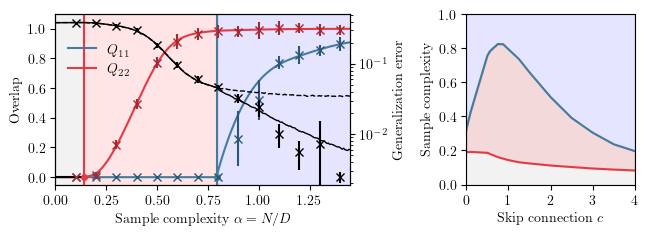

In [116]:
colors = ["#457B9D", "#E63946", "#2C5675", "#A72833"]
fig, ax = plt.subplots(1,2, figsize=(2.4*3.116, 2.216), sharey=False, gridspec_kw={'width_ratios': [1.75, 1], "wspace": 0.5})

alpha_1 = 0.793646302451566 
alpha_2 = 0.14358446549404996

# fill the background until the threshold
ax[0].fill_between([0, alpha_2], -0.05, 1.1, color='gray', alpha=0.1)
ax[0].fill_between([alpha_2, alpha_1], -0.05, 1.1, color='red', alpha=0.1)
ax[0].fill_between([alpha_1, 1.6], -0.05, 1.1, color='blue', alpha=0.1)

data = pd.read_csv('data/BO_2w.csv')
alpha_raw = np.array(data['alpha'].values)
Q11_raw = np.array(data['Q11'].values)
Q22_raw = np.array(data['Q22'].values)

alpha_Q11_smooth, Q11_smooth = spline_smooth(alpha_raw, Q11_raw, smoothen_spline=0.01, threshold=alpha_1)
alpha_Q22_smooth, Q22_smooth = spline_smooth(alpha_raw, Q22_raw, smoothen_spline=0.001, threshold=alpha_2)


ax[0].plot(alpha_Q11_smooth, Q11_smooth, color=colors[0], linestyle="-", label=r"$Q_{11}$")
ax[0].plot(alpha_Q22_smooth, Q22_smooth, color=colors[1], linestyle="-", label=r"$Q_{22}$")

ax[0].plot([0, alpha_2], [0, 0], color='black', linestyle="-")

ax[0].plot(alpha_1, 0, color=colors[0], linestyle="", marker="o", markersize=4)
ax[0].plot(alpha_2, 0, color=colors[1], linestyle="", marker="o", markersize=4)

ax[0].axvline(x=alpha_1, color=colors[0], linestyle="-")
ax[0].axvline(x=alpha_2, color=colors[1], linestyle="-")

ax[0].set_xlim(0, 1.6)
ax[0].set_ylim((-0.05,1.1))
ax[0].set_xlabel(r'Sample complexity $\alpha = N / D$')
ax[0].set_ylabel(r"Overlap")


# AMP
data = pd.read_csv('data/AMP_2w.csv')
ax[0].errorbar(data["alpha"], data["Q11_mean"], data["Q11_std"], linestyle="", marker="x", color=colors[2])
ax[0].errorbar(data["alpha"], data["Q22_mean"], data["Q22_std"], linestyle="", marker="x", color=colors[3])

# Lengend a bit lower than usual
ax[0].legend(frameon=False, loc='upper left', bbox_to_anchor=(0.0, 0.9))

ax2 = ax[0].twinx()

# State evolution
data = pd.read_csv('data/gen_error_BO_2w_smooth.csv')
ax2.plot(data["alpha"], data["gen_error"], color="black", lw=1)


data = pd.read_csv('data/gen_error_BO_2w_one_layer_smooth.csv')
ax2.plot(data["alpha"], data["gen_error"], color="black", linestyle="--", lw=1)


# AMP
data = pd.read_csv('data/gen_error_AMP_2w.csv')
ax2.errorbar(data["alpha"], data["gen_error_mean"], data["gen_error_std"], linestyle="", marker="x", color="black")

ax2.set_xlim(0, 1.45)
ax2.set_yscale('log')
ax2.set_ylabel(r"Generalization error")


data = pd.read_csv('data/alpha_critical.csv')
ax[1].fill_between(data["skip"], np.zeros(len(data["skip"])), data["alpha1"], color='gray', alpha=.1)
ax[1].fill_between(data["skip"], data["alpha2"], data["alpha1"], color='red', alpha=.1)
ax[1].fill_between(data["skip"], data["alpha1"], np.ones(len(data["skip"])), color='blue', alpha=.1)

ax[1].plot(data["skip"], data["alpha1"], color=colors[0], linestyle="-")
ax[1].plot(data["skip"], data["alpha2"], color=colors[1], linestyle="-")

ax[1].set_xlim(0, 4.)
ax[1].set_ylim(0, 1.)
ax[1].set_xlabel(r'Skip connection $c$')
ax[1].set_ylabel("Sample complexity")

fig.savefig("fig/Figure_1_twin.pdf", bbox_inches='tight')

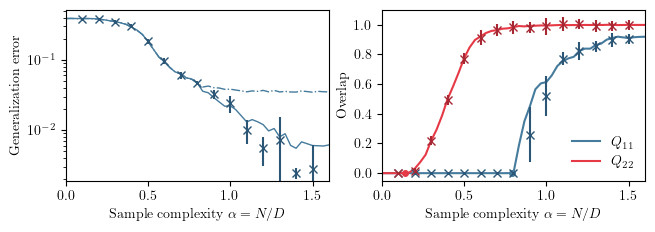

In [117]:
colors = ["#457B9D", "#E63946", "#2C5675", "#A72833"]
fig, ax = plt.subplots(1,2, figsize=(2.4*3.116, 2.216), sharey=False)

plt.subplot(1,2,2)

# State evolution
data = pd.read_csv('data/BO_2w.csv')
plt.plot(data["alpha"], data["Q11"], label=r"$Q_{11}$", color=colors[0], marker="")
plt.plot(data["alpha"], data["Q22"], label=r"$Q_{22}$", color=colors[1], marker="")


# AMP
data = pd.read_csv('data/AMP_2w.csv')
plt.errorbar(data["alpha"], data["Q11_mean"], data["Q11_std"], linestyle="", marker="x", color=colors[2])
plt.errorbar(data["alpha"], data["Q22_mean"], data["Q22_std"], linestyle="", marker="x", color=colors[3])

plt.xlabel(r'Sample complexity $\alpha = N / D$')
plt.ylabel(f"Overlap")

plt.xlim((0,1.6))
plt.ylim((-0.05,1.1))

alpha_1 = 0.793646302451566 
alpha_2 = 0.14358446549404996

plt.plot(alpha_1, 0, color=colors[0], linestyle="", marker="o", markersize=4)
plt.plot(alpha_2, 0, color=colors[1], linestyle="", marker="o", markersize=4)


plt.legend(frameon=False, loc="lower right")


plt.subplot(1,2,1)

# State evolution
data = pd.read_csv('data/gen_error_BO_2w.csv')
plt.plot(data["alpha"], data["gen_error"], color=colors[0], lw=1)

data = pd.read_csv('data/gen_error_BO_2w_one_layer.csv')
plt.plot(data["alpha"], data["gen_error"], color=colors[0], linestyle="-.", lw=1)


# AMP
data = pd.read_csv('data/gen_error_AMP_2w.csv')
plt.errorbar(data["alpha"], data["gen_error_mean"], data["gen_error_std"], linestyle="", marker="x", color=colors[2])

plt.axhline(0, color="black", linestyle="-")


plt.xlim((0,1.6))
plt.yscale('log')
plt.xlabel(r'Sample complexity $\alpha = N / D$')
plt.ylabel(f"Generalization error")

plt.savefig("fig/Figure_1_old.pdf", bbox_inches='tight')


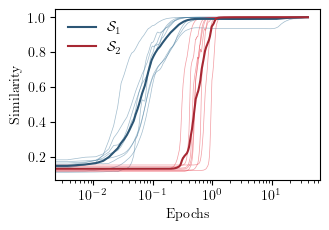

In [118]:
colors = ["#457B9D", "#E63946", "#2C5675", "#A72833"]
plt.figure(figsize=(3.416, 2.216))

dist_samples_1 = np.load("data/dist_1.npy")
dist_samples_2 = np.load("data/dist_2.npy")

plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_1.T, color=colors[0], lw=0.5, alpha=0.5)
plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_2.T, color=colors[1], lw=0.5, alpha=0.5)

plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_1.mean(axis=0), label=r"$\mathcal{S}_1$", color=colors[2])
plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_2.mean(axis=0), label=r"$\mathcal{S}_2$", color=colors[3])

plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Similarity")
plt.xscale('log')

# plt.xlim(0.005, 40)

plt.savefig("fig/Figure_3_old.pdf", bbox_inches='tight')

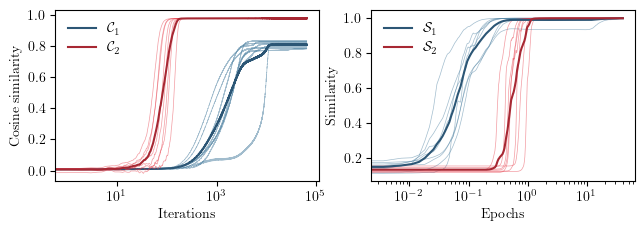

In [119]:
colors = ["#457B9D", "#E63946", "#2C5675", "#A72833"]
fig, ax = plt.subplots(1,2, figsize=(2.4*3.116, 2.216), sharey=False)

plt.subplot(1,2,2)

dist_samples_1 = np.load("data/dist_1.npy")
dist_samples_2 = np.load("data/dist_2.npy")

plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_1.T, color=colors[0], lw=0.5, alpha=0.5)
plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_2.T, color=colors[1], lw=0.5, alpha=0.5)

plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_1.mean(axis=0), label=r"$\mathcal{S}_1$", color=colors[2])
plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_2.mean(axis=0), label=r"$\mathcal{S}_2$", color=colors[3])

plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Similarity")
plt.xscale('log')


plt.subplot(1,2,1)

data = np.load(f"data/C1_random.npy")
sign_correction = 2*(data[:,-1] > 0) - 1

data_corrected = data * sign_correction[:,None]
plt.plot(data_corrected.T, color=colors[0], alpha=0.5, lw=0.5)
plt.plot(data_corrected.mean(axis=0), color=colors[2], label=r"$\mathcal{C}_1$")


data = np.load(f"data/C2_random.npy")
sign_correction = 2*(data[:,-1] > 0) - 1

data_corrected = data * sign_correction[:,None]
plt.plot(data_corrected.T, color=colors[1], alpha=0.5, lw=0.5)
plt.plot(data_corrected.mean(axis=0), color=colors[3], label=r"$\mathcal{C}_2$")

plt.legend(frameon=False)

plt.xscale('log')

plt.xlabel("Iterations")
plt.ylabel("Cosine similarity")

plt.savefig("fig/Figure_3.pdf", bbox_inches='tight')

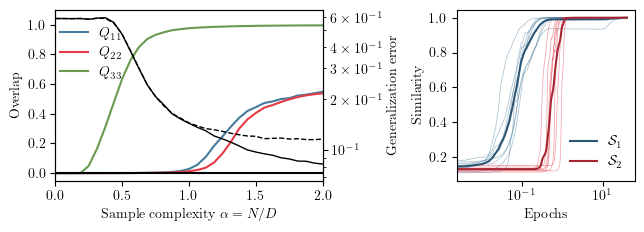

In [131]:
colors = ["#457B9D", "#E63946", "#2C5675", "#A72833"]

fig, ax = plt.subplots(1,2, figsize=(2.4*3.116, 2.216), sharey=False, gridspec_kw={'width_ratios': [1.5, 1], "wspace": 0.6})

plt.subplot(1,2,2)

dist_samples_1 = np.load("data/dist_1.npy")
dist_samples_2 = np.load("data/dist_2.npy")

plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_1.T, color=colors[0], lw=0.5, alpha=0.5)
plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_2.T, color=colors[1], lw=0.5, alpha=0.5)

plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_1.mean(axis=0), label=r"$\mathcal{S}_1$", color=colors[2])
plt.plot(np.linspace(0, 40, dist_samples_1.shape[1]), dist_samples_2.mean(axis=0), label=r"$\mathcal{S}_2$", color=colors[3])

plt.legend(frameon=False)
plt.xlabel("Epochs")
plt.ylabel("Similarity")
plt.xscale('log')


plt.subplot(1,2,1)

colors = ["#457B9D", "#E63946", "#6A994E", "#2C5675", "#A72833", "#386641"]
# State evolution
data = pd.read_csv('data/BO_3w.csv')
plt.plot(data["alpha"], data["Q11"], label=r"$Q_{11}$", color=colors[0])
plt.plot(data["alpha"], data["Q22"], label=r"$Q_{22}$", color=colors[1])
plt.plot(data["alpha"], data["Q33"], label=r"$Q_{33}$", color=colors[2])



plt.xlabel(r'Sample complexity $\alpha = N / D$')
plt.ylabel(f"Overlap")

plt.xlim((0,2.))
plt.ylim((-0.05,1.1))
plt.axhline(0, color="black", linestyle="-")


plt.legend(frameon=False, loc="upper left", bbox_to_anchor=(-0.03, 0.97))

ax2 = ax[0].twinx()
data = pd.read_csv('data/gen_error_BO_3w.csv')
ax2.plot(data["alpha"], data["gen_error"], color="black", lw=1)

data = pd.read_csv('data/gen_error_BO_3w_last_layer.csv')
ax2.plot(data["alpha"], data["gen_error"], color="black", linestyle="--", lw=1)
ax2.set_ylabel(r"Generalization error")
ax2.set_yscale('log')


plt.savefig("fig/Figure_3_new.pdf", bbox_inches='tight')

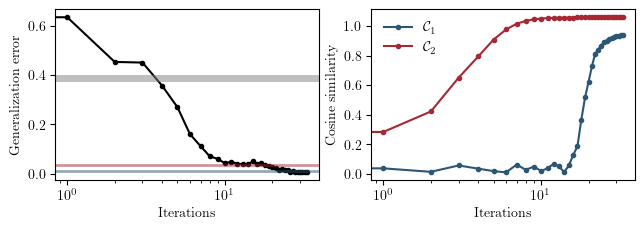

In [121]:
colors = ["#457B9D", "#E63946", "#2C5675", "#A72833"]
fig, ax = plt.subplots(1,2, figsize=(2.4*3.116, 2.216), sharey=False)

plt.subplot(1,2,1)


plt.plot(np.load(f"data/2w_e_gen_d{1000}_alpha{1.2}_samples1_seed1.npy")[:], marker=".", color="black")

data = pd.read_csv('data/gen_error_BO_2w.csv')
gen_error_zero = data["gen_error"][0]
gen_error_full = data["gen_error"][36]

data = pd.read_csv('data/gen_error_BO_2w_one_layer.csv')
gen_error_one = data["gen_error"][36]

plt.axhline(gen_error_zero, color='gray', linestyle="-", lw=5, alpha = 0.5)
plt.axhline(gen_error_one, color=colors[3], linestyle="-", lw=2, alpha = 0.5)
plt.axhline(gen_error_full, color=colors[2], linestyle="-", lw=2, alpha = 0.5)

plt.xscale("log")


plt.xlabel("Iterations")
plt.ylabel("Generalization error")


plt.subplot(1,2,2)

plt.xlabel("Iterations")
plt.ylabel("Cosine similarity")

M11 = np.abs(np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,0,0])
M12 = np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,0,1]
M21 = np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,1,0]
M22 = np.abs(np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,1,1])

Q11 = np.array([0.0486702, 0.07225786, 0.01251389, 0.04260792, 0.01636443, 0.09943516, 
 0.04243677, 0.37061162, 0.09684821, 0.5320698, 0.17103162, 0.45562906, 
 0.30545907, 0.41270007, 0.38583303, 0.49319571, 0.4168609, 0.38410595, 
 0.46652435, 0.49880665, 0.55272534, 0.61118504, 0.65214856, 0.69184505, 
 0.70198443, 0.72383352, 0.72162928, 0.74464462, 0.74679141, 0.75688189, 
 0.75613677, 0.75397049, 0.75658042, 0.76064953]
)

Q22 = np.array([0.34211042, 1.37339999, 0.72505987, 1.19063012, 1.03800363, 1.2026546, 
 1.14016995, 1.13818946, 1.11755712, 1.11697078, 1.10540574, 1.11786401, 
 1.11655613, 1.120012, 1.11600583, 1.11490668, 1.11609528, 1.11867997, 
 1.1184805, 1.11681475, 1.12105857, 1.11701311, 1.11478586, 1.11300499, 
 1.11344296, 1.11433813, 1.11636928, 1.11681489, 1.11683432, 1.11898691, 
 1.11837686, 1.11800234, 1.11871953, 1.11897841]
)


plt.plot(M11/np.sqrt(Q11), color=colors[2], label=r"$\mathcal{C}_1$", marker=".")
plt.plot(M22/np.sqrt(Q22), color=colors[3], label=r"$\mathcal{C}_2$", marker=".")

plt.xscale("log")

plt.legend(frameon=False)

plt.savefig("fig/Figure_2_old.pdf", bbox_inches='tight')

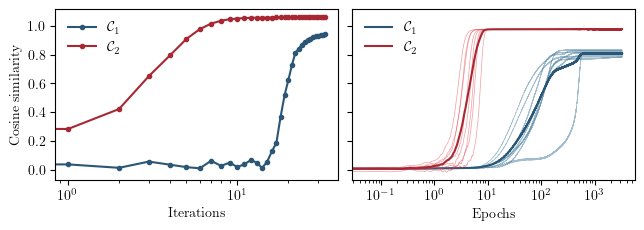

In [122]:
colors = ["#457B9D", "#E63946", "#2C5675", "#A72833"]
fig, ax = plt.subplots(1,2, figsize=(2.4*3.116, 2.216), sharey=True, gridspec_kw={"wspace": 0.05})

plt.subplot(1,2,2)


data = np.load(f"data/C1_random.npy")
sign_correction = 2*(data[:,-1] > 0) - 1

data_corrected = data * sign_correction[:,None]
plt.plot(np.arange(data_corrected.shape[1])/20, data_corrected.T, color=colors[0], alpha=0.5, lw=0.5)
plt.plot(np.arange(data_corrected.shape[1])/20, data_corrected.mean(axis=0), color=colors[2], label=r"$\mathcal{C}_1$")


data = np.load(f"data/C2_random.npy")
sign_correction = 2*(data[:,-1] > 0) - 1

data_corrected = data * sign_correction[:,None]
plt.plot(np.arange(data_corrected.shape[1])/20, data_corrected.T, color=colors[1], alpha=0.5, lw=0.5)
plt.plot(np.arange(data_corrected.shape[1])/20, data_corrected.mean(axis=0), color=colors[3], label=r"$\mathcal{C}_2$")

plt.legend(frameon=False)

plt.xscale('log')

plt.xlabel("Epochs")
# plt.ylabel("Cosine similarity")


plt.subplot(1,2,1)

plt.xlabel("Iterations")
plt.ylabel("Cosine similarity")

M11 = np.abs(np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,0,0])
M12 = np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,0,1]
M21 = np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,1,0]
M22 = np.abs(np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,1,1])

Q11 = np.array([0.0486702, 0.07225786, 0.01251389, 0.04260792, 0.01636443, 0.09943516, 
 0.04243677, 0.37061162, 0.09684821, 0.5320698, 0.17103162, 0.45562906, 
 0.30545907, 0.41270007, 0.38583303, 0.49319571, 0.4168609, 0.38410595, 
 0.46652435, 0.49880665, 0.55272534, 0.61118504, 0.65214856, 0.69184505, 
 0.70198443, 0.72383352, 0.72162928, 0.74464462, 0.74679141, 0.75688189, 
 0.75613677, 0.75397049, 0.75658042, 0.76064953]
)

Q22 = np.array([0.34211042, 1.37339999, 0.72505987, 1.19063012, 1.03800363, 1.2026546, 
 1.14016995, 1.13818946, 1.11755712, 1.11697078, 1.10540574, 1.11786401, 
 1.11655613, 1.120012, 1.11600583, 1.11490668, 1.11609528, 1.11867997, 
 1.1184805, 1.11681475, 1.12105857, 1.11701311, 1.11478586, 1.11300499, 
 1.11344296, 1.11433813, 1.11636928, 1.11681489, 1.11683432, 1.11898691, 
 1.11837686, 1.11800234, 1.11871953, 1.11897841]
)


plt.plot(M11/np.sqrt(Q11), color=colors[2], label=r"$\mathcal{C}_1$", marker=".")
plt.plot(M22/np.sqrt(Q22), color=colors[3], label=r"$\mathcal{C}_2$", marker=".")

plt.xscale("log")

plt.legend(frameon=False)

plt.savefig("fig/Figure_2.pdf", bbox_inches='tight')

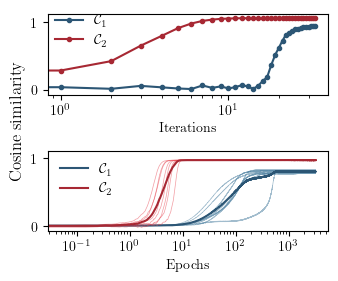

In [123]:
colors = ["#457B9D", "#E63946", "#2C5675", "#A72833"]
fig, ax = plt.subplots(2,1, figsize=(3.616, 2.816), sharey=True, gridspec_kw={"hspace": 0.7})

plt.subplot(2,1,2)


data = np.load(f"data/C1_random.npy")
sign_correction = 2*(data[:,-1] > 0) - 1

data_corrected = data * sign_correction[:,None]
plt.plot(np.arange(data_corrected.shape[1])/20, data_corrected.T, color=colors[0], alpha=0.5, lw=0.5)
plt.plot(np.arange(data_corrected.shape[1])/20, data_corrected.mean(axis=0), color=colors[2], label=r"$\mathcal{C}_1$")


data = np.load(f"data/C2_random.npy")
sign_correction = 2*(data[:,-1] > 0) - 1

data_corrected = data * sign_correction[:,None]
plt.plot(np.arange(data_corrected.shape[1])/20, data_corrected.T, color=colors[1], alpha=0.5, lw=0.5)
plt.plot(np.arange(data_corrected.shape[1])/20, data_corrected.mean(axis=0), color=colors[3], label=r"$\mathcal{C}_2$")

# Higher legend than usual
plt.legend(frameon=False)

plt.xscale('log')

plt.xlabel("Epochs")
# plt.ylabel("Cosine similarity")


plt.subplot(2,1,1)

plt.xlabel("Iterations")
fig.supylabel("Cosine similarity")

M11 = np.abs(np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,0,0])
M12 = np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,0,1]
M21 = np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,1,0]
M22 = np.abs(np.load(f"data/AMP_BO_2w_d{1000}_alpha{1.2}_samples1_seed1.npy")[:,1,1])

Q11 = np.array([0.0486702, 0.07225786, 0.01251389, 0.04260792, 0.01636443, 0.09943516, 
 0.04243677, 0.37061162, 0.09684821, 0.5320698, 0.17103162, 0.45562906, 
 0.30545907, 0.41270007, 0.38583303, 0.49319571, 0.4168609, 0.38410595, 
 0.46652435, 0.49880665, 0.55272534, 0.61118504, 0.65214856, 0.69184505, 
 0.70198443, 0.72383352, 0.72162928, 0.74464462, 0.74679141, 0.75688189, 
 0.75613677, 0.75397049, 0.75658042, 0.76064953]
)

Q22 = np.array([0.34211042, 1.37339999, 0.72505987, 1.19063012, 1.03800363, 1.2026546, 
 1.14016995, 1.13818946, 1.11755712, 1.11697078, 1.10540574, 1.11786401, 
 1.11655613, 1.120012, 1.11600583, 1.11490668, 1.11609528, 1.11867997, 
 1.1184805, 1.11681475, 1.12105857, 1.11701311, 1.11478586, 1.11300499, 
 1.11344296, 1.11433813, 1.11636928, 1.11681489, 1.11683432, 1.11898691, 
 1.11837686, 1.11800234, 1.11871953, 1.11897841]
)


plt.plot(M11/np.sqrt(Q11), color=colors[2], label=r"$\mathcal{C}_1$", marker=".")
plt.plot(M22/np.sqrt(Q22), color=colors[3], label=r"$\mathcal{C}_2$", marker=".")

plt.xscale("log")

plt.legend(frameon=False, loc="upper left", bbox_to_anchor=(-0.02, 1.15))

plt.savefig("fig/Figure_2_new.pdf", bbox_inches='tight')

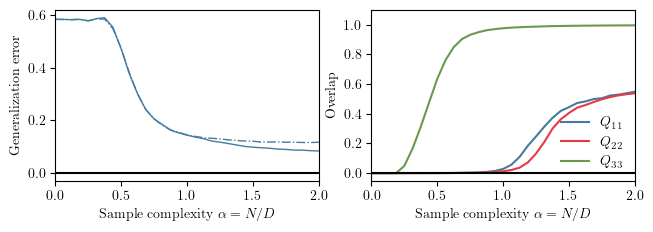

In [124]:
colors = ["#457B9D", "#E63946", "#6A994E", "#2C5675", "#A72833", "#386641"]
fig, ax = plt.subplots(1,2, figsize=(2.4*3.116, 2.216), sharey=False)

plt.subplot(1,2,2)

# State evolution
data = pd.read_csv('data/BO_3w.csv')
plt.plot(data["alpha"], data["Q11"], label=r"$Q_{11}$", color=colors[0])
plt.plot(data["alpha"], data["Q22"], label=r"$Q_{22}$", color=colors[1])
plt.plot(data["alpha"], data["Q33"], label=r"$Q_{33}$", color=colors[2])



plt.xlabel(r'Sample complexity $\alpha = N / D$')
plt.ylabel(f"Overlap")

plt.xlim((0,2.))
plt.ylim((-0.05,1.1))
plt.axhline(0, color="black", linestyle="-")


plt.legend(frameon=False, loc="lower right")


plt.subplot(1,2,1)

colors = ["#457B9D", "#E63946", "#2C5675", "#A72833"]
# State evolution
data = pd.read_csv('data/gen_error_BO_3w.csv')
plt.plot(data["alpha"], data["gen_error"], color=colors[0], lw=1)

data = pd.read_csv('data/gen_error_BO_3w_last_layer.csv')
plt.plot(data["alpha"], data["gen_error"], color=colors[0], linestyle="-.", lw=1)



plt.axhline(0, color="black", linestyle="-")


plt.xlim((0,2.))

plt.xlabel(r'Sample complexity $\alpha = N / D$')
plt.ylabel(f"Generalization error")

plt.savefig("fig/Figure_4.pdf", bbox_inches='tight')